### Download Necessary Files

In [64]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [65]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

## 1-1 Exercises

In [66]:
import warnings
import nsfg
import numpy as np

warnings.filterwarnings("ignore")
preg = nsfg.ReadFemPreg()

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [67]:
preg.birthord.value_counts(dropna=False)

birthord
NaN     4445
1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: count, dtype: int64

We can also use `isnull` to count the number of nans.

In [68]:
preg.birthord.isnull().sum()

np.int64(4445)

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [69]:
preg.prglngth.value_counts(dropna=False)

prglngth
39    4744
40    1120
38     609
9      594
41     591
6      543
37     457
13     446
4      412
8      409
35     357
36     329
42     328
17     253
11     202
30     198
5      181
7      175
12     170
3      151
43     148
22     147
10     137
32     122
26     117
2       78
34      60
33      50
44      46
16      44
15      39
28      38
21      37
19      34
24      31
14      29
31      29
29      23
20      18
18      17
25      15
0       15
23      12
45      10
1        9
27       8
48       7
50       2
47       1
46       1
Name: count, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [70]:
preg.totalwgt_lb.mean()

np.float64(7.265628457623368)

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [71]:
preg['totalwgt_kg'] = 2.2*(preg.birthwgt_lb + preg.birthwgt_oz / 16)
preg.totalwgt_kg.mean()

np.float64(15.98438260677141)

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [72]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [73]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [74]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [75]:
resp.age_r.value_counts().sort_index()

age_r
15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: count, dtype: int64

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [76]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [77]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,15.1250
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,12.1000
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,9.2125
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,15.1250


How old is the respondent with `caseid` 1?

In [78]:
resp[resp.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [79]:
preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5013?

In [80]:
preg[preg.caseid==5013].birthwgt_lb

5516    7.0
5517    NaN
5518    8.0
5519    8.0
Name: birthwgt_lb, dtype: float64

## 1.2 Exercise -Read 2002FemResp

In [81]:
import thinkstats2

## Create Function for reading Femresp file
def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz'):
    """Reads the NSFG pregnancy data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    return df

## Call the created function
preg = ReadFemResp()
## Print some values from FemResp
preg.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


## 2-1 - Exercise - First Baby Prediction

Based on the findings discussed in Chapter 2 of Think Stats, the data suggests that first babies may arrive slightly later on average compared to subsequent babies. The difference in arrival time is observed when comparing the mean and median gestation periods, with first babies tending to have a slightly longer average gestation.

However, it’s important to note that while this trend is statistically significant, the practical effect size (such as Cohen's d) is relatively small. This indicates that the difference, while measurable, may not have a substantial impact in practical terms.

### Paragraph about the First Babies

Do first babies arrive late? According to statistical analysis, first babies tend to arrive slightly later than subsequent babies on average. Studies show that the mean gestation period for firstborns is marginally longer, often by about a day or two, compared to later-born babies. However, while this trend is statistically significant, the practical difference is relatively small and may not hold for every individual. Variability in gestation periods and potential reporting biases also play a role in these findings. In summary, while first babies may arrive a little later on average, the difference is minor and should not cause undue concern.

## 2-2 -Excercise -totalwgt_lb investigation

In [82]:
# differentiating first and other babies
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

firsts = live[live.birthord == 1]
others = live[live.birthord != 1]


In [83]:
# Function for CohenEffect
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

### Cohen Effect for Totalweight

In [84]:
# CohenEffect for totalweight
cohen_totalweight = CohenEffectSize (firsts.totalwgt_lb,others.totalwgt_lb)
print (cohen_totalweight)

-0.08867292707260174


A Cohen's d effect size of  <B> -0.0887 </B> indicates a very small effect size in the context of comparing two groups

<I>Magnitude:</I> The negative sign shows the direction of the effect, with the first group (e.g., first babies) tending to have slightly lower values in total weight than the second group. However, the magnitude is quite small, meaning the groups are very similar in practical terms.

### Cohen Effect for pregnancy Length

In [85]:
# CohenEffect for pregnancy Length
cohen_prglngth = CohenEffectSize (firsts.prglngth,others.prglngth)
print (cohen_prglngth)

0.028879044654449834


A Cohen's d value of <B>0.0289 </B> indicates an extremely small effect size, suggesting that the difference between the two groups being compared is almost negligible

<I>Magnitude:</I> The value is very close to zero, showing that the groups are nearly identical in the pregnancy length.

### Comparing Cohan effect of Pregnancy lenth and Total Weight

An analysis of Cohen's d effect size for pregnancy length and total weight demonstrates that first babies arrive at nearly the same time as subsequent babies. Although the Cohen's d for pregnancy length is positive, the effect size is negligible, indicating no meaningful difference. Similarly, the effect size for total weight shows no significant variation between firstborns and later-born babies. These findings suggest that first babies do not differ substantially in gestation or weight compared to their siblings, reinforcing the similarity in outcomes across groups.

## 2.2 - Other Excercises from the Book

In [86]:
resp = nsfg.ReadFemResp()
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Make a histogram of <tt>totincr</tt> the total income for the respondent's family.

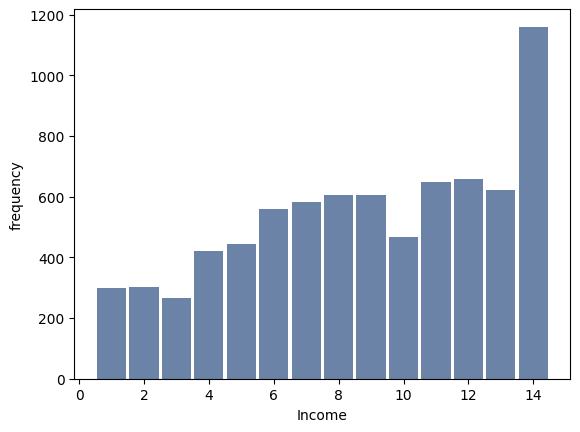

In [87]:
import thinkplot
hist = thinkstats2.Hist(resp.totincr)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Income', ylabel='frequency')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

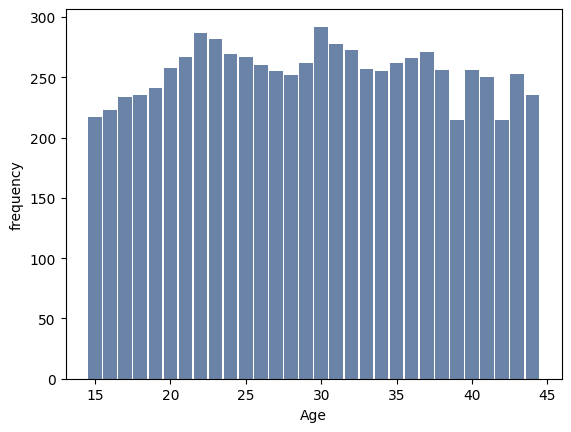

In [88]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age', ylabel='frequency')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

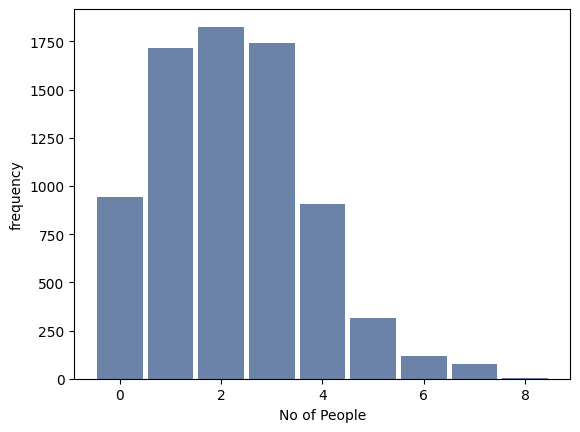

In [89]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='No of People', ylabel='frequency')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

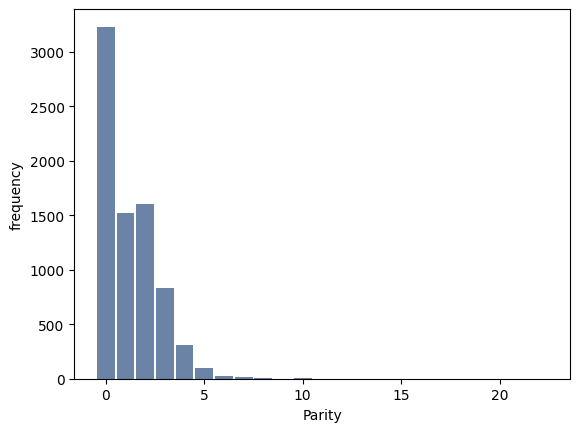

In [90]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Parity', ylabel='frequency')

<B>Findings : </B>
The histogram is heavily right-skewed, with most families having zero or one child.

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [91]:
hist.Largest(10)

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

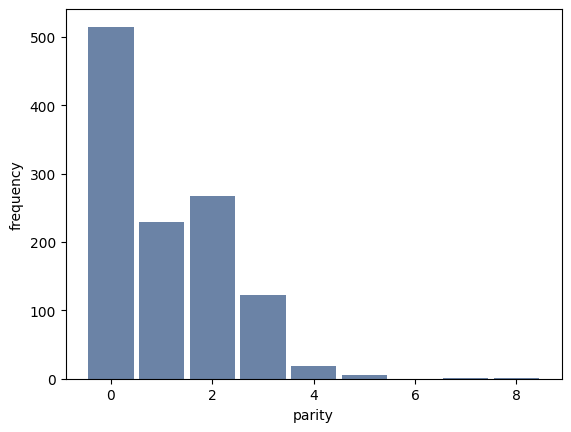

In [92]:
high_income = resp [resp.totincr == 14]

hist = thinkstats2.Hist(high_income.parity)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='parity', ylabel='frequency')

Find the largest parities for high income respondents.

In [93]:
hist.Largest(10)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [94]:
other_income = resp [resp.totincr < 14]

high_income.parity.mean() , other_income.parity.mean()


(np.float64(1.0758620689655172), np.float64(1.2495758136665125))

Compute the Cohen effect size for this difference.

In [95]:
cohen_parity = CohenEffectSize (high_income.parity,other_income.parity)
print (cohen_parity)

-0.12511855314660367
